### Perceptron Algorithm for Binary Classification

We will create a Perceptron class, which will be used to train a model for binary classification.

Perceptron Class will have a fit method to train the model. A constructor to initialize the hyperparameters (learning_rate, epochs, and random_seed).

In the fit method, we will create a weight vector (With the input dimensions) and bias, and train the model for the number of epochs.

We'll also define a predict method to make predictions on new data.


In [143]:
import numpy as np
from numpy.random import RandomState

class Perceptron:
    def __init__(self, learning_rate=0.01, random_state=1):
        self.learning_rate = learning_rate
        self.w = None
        self.b = None
        self.rgen = RandomState(random_state)
        self.errors = []

    def fit(self, X, y, n_iters=100):
        if self.w is None:
            self.w = self.rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]) 
            self.b = self.rgen.rand(1)[0]
        error = 0
        for _ in range(n_iters):
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.w += update * xi
                self.b += update
                error += int(update != 0.0)
        self.errors.append(error)        

    # This is a vectorized operation over a matrix
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    # This is also a vectorized operation over a matrix
    def net_input(self, X):
        return np.dot(X, self.w) + self.b    

In [50]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
data = iris.data
data['target'] = iris.target
#filter out the setosa
data = data[data['target'] != 2]

#### Verify that the data is linearly separable

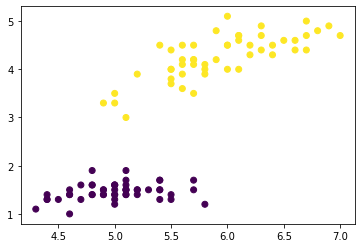

In [118]:
#plot sepal length and petal length with target
import matplotlib.pyplot as plt
plt.scatter(data['sepal length (cm)'], data['petal length (cm)'], c=data['target']);

In [119]:
clean_data = data

In [120]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('target', axis=1), clean_data['target'], test_size=0.3, random_state=1)

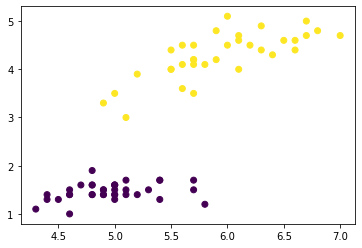

In [121]:
#Plot the training data
plt.scatter(X_train['sepal length (cm)'], X_train['petal length (cm)'], c=y_train);

#### Train the Perceptron

In [149]:
perceptron = Perceptron(learning_rate=0.01, random_state=1)
perceptron.fit(X_train.to_numpy(), y_train.to_numpy(), 1)
perceptron.errors

[15]

In [150]:
perceptron.fit(X_train.to_numpy(), y_train.to_numpy(), 1)
perceptron.errors

[15, 0]

### Evaluate the Perceptron

In [151]:
from sklearn.metrics import classification_report
y_pred = perceptron.predict(X_test.to_numpy())
print(classification_report(y_test, y_pred, target_names=['versicolor', 'virginica']))

              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

